# Sample usage

This notebook gives you introduction to use the package.

In [2]:
import pathlib
import sys
sys.path.append("../")
sys.path.append(".")
from model_criticism_mmd import ModelTrainerTorchBackend, MMD, TwoSampleDataSet, split_data
from model_criticism_mmd.backends import kernels_torch
from model_criticism_mmd.models.static import DEFAULT_DEVICE

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas
import torch

In [4]:
N_EPOCHS = 300

# Device choice

If you are able to use CUDA, you can give `device_obj` to objects. The default value is CPU.

In [5]:
device_obj = DEFAULT_DEVICE

# Scenario-1: 2 distributions are similar

In [6]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(3, 0.5, size=(500, 2))

In [6]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

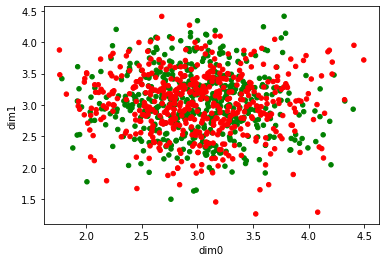

In [7]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c=df_data_scenario_1['label'])

In [8]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [23]:
dataset_train = TwoSampleDataSet(x_train, y_train, device_obj=device_obj)
dataset_val = TwoSampleDataSet(x_test, y_test, device_obj=device_obj)
# you can use split_data function also.
# dataset_train, dataset_val, = split_data(x_train, y_train)

mmd_estimator = MMD(kernels_torch.BasicRBFKernelFunction(device_obj=device_obj, opt_sigma=False), device_obj=device_obj)
trainer = ModelTrainerTorchBackend(mmd_estimator=mmd_estimator, device_obj=device_obj)
trained_obj = trainer.train(dataset_training=dataset_train, dataset_validation=dataset_val, num_epochs=N_EPOCHS, batchsize=200, is_training_auto_stop=True, auto_stop_epochs=10)

2021-08-19 10:52:44,870 - model_criticism_mmd.logger_unit - INFO - Getting median initial sigma value...
2021-08-19 10:52:44,884 - model_criticism_mmd.logger_unit - INFO - initial sigma by median-heuristics 3.31
2021-08-19 10:52:44,891 - model_criticism_mmd.logger_unit - INFO - Validation at 0. MMD^2 = 0.7499040624574873, ratio = [12.08378054] obj = [-2.4918641]
2021-08-19 10:52:45,324 - model_criticism_mmd.logger_unit - INFO -      5: [avg train] MMD^2 0.9353716929366721 obj [-3.35463414] val-MMD^2 0.9159799550895825 val-ratio [21.92481754] val-obj [-3.08761922]  elapsed: 0.0
2021-08-19 10:52:46,962 - model_criticism_mmd.logger_unit - INFO -     25: [avg train] MMD^2 0.8672578253303322 obj [-4.15287331] val-MMD^2 0.8643508358320624 val-ratio [47.24194405] val-obj [-3.85528214]  elapsed: 0.0
2021-08-19 10:52:49,072 - model_criticism_mmd.logger_unit - INFO -     50: [avg train] MMD^2 0.8706350034292876 obj [-4.15378334] val-MMD^2 0.86864113430384 val-ratio [47.21021788] val-obj [-3.8546

In [24]:
trained_params = trained_obj.kernel_function_obj.get_params()
print(f'Preffered parameters scales = {trained_obj.scales}, {trained_params}')

Preffered parameters scales = [2.0769694 1.9865376], {'log_sigma': tensor(1.1958, dtype=torch.float64)}


In [25]:
mmd2, ratio = trainer.mmd_distance(x_test, y_test)
print(f'MMD^2 distance = {mmd2}')

MMD^2 distance = 0.8690276207811969


# Scenario-2: 2 distributions are not similar

In [12]:
x = np.random.normal(3, 0.5, size=(500, 2))
y = np.random.normal(10, 5.5, size=(500, 2))

In [13]:
df_x = pandas.DataFrame(x)
df_x['label'] = 'green'
df_y = pandas.DataFrame(y)
df_y['label'] = 'red'
df_data_scenario_1 = pandas.concat([df_x, df_y])
df_data_scenario_1.columns = ['dim0', 'dim1', 'label']

<AxesSubplot:xlabel='dim0', ylabel='dim1'>

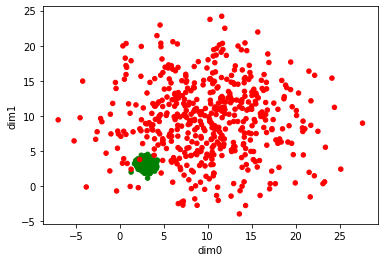

In [14]:
df_data_scenario_1.plot.scatter(x='dim0', y='dim1', c=df_data_scenario_1['label'])

In [15]:
n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [26]:
dataset_train = TwoSampleDataSet(x_train, y_train, device_obj=device_obj)
dataset_val = TwoSampleDataSet(x_test, y_test, device_obj=device_obj)

mmd_estimator = MMD(kernels_torch.BasicRBFKernelFunction(device_obj=device_obj, opt_sigma=False), device_obj=device_obj)
trainer = ModelTrainerTorchBackend(mmd_estimator, device_obj=device_obj)
trained_obj = trainer.train(dataset_training=dataset_train, dataset_validation=dataset_val, num_epochs=N_EPOCHS, batchsize=200, is_training_auto_stop=True, auto_stop_epochs=10)

2021-08-19 10:53:02,076 - model_criticism_mmd.logger_unit - INFO - Getting median initial sigma value...
2021-08-19 10:53:02,095 - model_criticism_mmd.logger_unit - INFO - initial sigma by median-heuristics 1.82
2021-08-19 10:53:02,100 - model_criticism_mmd.logger_unit - INFO - Validation at 0. MMD^2 = 0.7085217549860783, ratio = [13.8008377] obj = [-2.62472929]
2021-08-19 10:53:02,553 - model_criticism_mmd.logger_unit - INFO -      5: [avg train] MMD^2 0.953197032134703 obj [-3.74128936] val-MMD^2 0.9369663703132459 val-ratio [37.26868527] val-obj [-3.61815344]  elapsed: 0.0
2021-08-19 10:53:04,216 - model_criticism_mmd.logger_unit - INFO -     25: [avg train] MMD^2 0.8748570812007492 obj [-4.15299836] val-MMD^2 0.8743095658410864 val-ratio [47.32088042] val-obj [-3.85695164]  elapsed: 0.0
2021-08-19 10:53:06,190 - model_criticism_mmd.logger_unit - INFO -     50: [avg train] MMD^2 0.8712265464803812 obj [-4.15369666] val-MMD^2 0.8691909549358483 val-ratio [47.21649284] val-obj [-3.854

In [27]:
trained_params = trained_obj.kernel_function_obj.get_params()
print(f'Preffered parameters scales = {trained_obj.scales} / {trained_params}')
mmd2, ratio = trainer.mmd_distance(x_test, y_test)
print(f'MMD^2 distance = {mmd2}')

Preffered parameters scales = [1.1437753 1.0954199] / {'log_sigma': tensor(0.5999, dtype=torch.float64)}
MMD^2 distance = 0.8690146117181595


# Kernel functions

You can set kernel functions as you like. The Kernel functions are in `model_criticism_mmd.backends.kernels_torch`

In [28]:
# example with Matern Kernel
from model_criticism_mmd.backends import kernels_torch
kernel_matern = kernels_torch.MaternKernelFunction(device_obj=device_obj, nu=0.5)
mmd_estimator_matern = MMD(kernel_matern, device_obj=device_obj)
trainer_matern = ModelTrainerTorchBackend(mmd_estimator_matern, device_obj=device_obj)
dataset_train = TwoSampleDataSet(x_train, y_train, device_obj)
dataset_val = TwoSampleDataSet(x_test, y_test, device_obj)
trained_obj_matern = trainer_matern.train(dataset_training=dataset_train, dataset_validation=dataset_val, 
                                          num_epochs=N_EPOCHS, batchsize=200, is_training_auto_stop=True, auto_stop_epochs=10)

2021-08-19 10:53:15,660 - model_criticism_mmd.logger_unit - INFO - Validation at 0. MMD^2 = 0.5178605470585024, ratio = [28.33218716] obj = [-3.34399851]
2021-08-19 10:53:16,197 - model_criticism_mmd.logger_unit - INFO -      5: [avg train] MMD^2 0.5354668678783611 obj [-3.71962478] val-MMD^2 0.5432190242421551 val-ratio [31.21891187] val-obj [-3.44102406]  elapsed: 0.0
2021-08-19 10:53:18,233 - model_criticism_mmd.logger_unit - INFO -     25: [avg train] MMD^2 0.6619219307560646 obj [-3.90994737] val-MMD^2 0.6556005887454041 val-ratio [35.63598853] val-obj [-3.57335604]  elapsed: 0.0
2021-08-19 10:53:20,757 - model_criticism_mmd.logger_unit - INFO -     50: [avg train] MMD^2 0.6602652818168723 obj [-3.91033852] val-MMD^2 0.6532412415338107 val-ratio [35.64142031] val-obj [-3.57350845]  elapsed: 0.0
2021-08-19 10:53:23,095 - model_criticism_mmd.logger_unit - INFO - Training stops at 72 automatically because epoch is set and variance in 10 epochs are within [6.66295792e-06] < 1e-05


In [29]:
trained_obj_matern.scales

array([0.3757256 , 0.37047493], dtype=float32)

As you see, the scales are totally different from the one with RBFKernel

## Kernel selection by test-power

In [36]:
from model_criticism_mmd import SelectionKernels
from model_criticism_mmd.backends.kernels_torch import BasicRBFKernelFunction, MaternKernelFunction
# scales can be None. In the case, the scales vector is initialized with 1.0 values.
scales = torch.tensor([0.05, 0.05])
kernels = [(scales, BasicRBFKernelFunction(device_obj=device_obj)),
           (scales, MaternKernelFunction(nu=0.5, device_obj=device_obj)),
          (scales, MaternKernelFunction(nu=1.5, device_obj=device_obj)),
          (scales, MaternKernelFunction(nu=2.5, device_obj=device_obj))]
# if is_training=True, the SelectionKernels class runs optimizations during selections.
selection_obj = SelectionKernels(candidate_kernels=kernels, dataset_validation=dataset_val, dataset_training=dataset_train, is_training=True)
result_select = selection_obj.run_selection(is_training_auto_stop=True, auto_stop_epochs=10)

2021-08-19 10:57:02,728 - model_criticism_mmd.logger_unit - INFO - Set the initial scales value
../model_criticism_mmd/backends/backend_torch.py:249: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  scales = torch.tensor(init_scale.clone().detach().cpu(), requires_grad=True, device=self.device_obj)
2021-08-19 10:57:02,730 - model_criticism_mmd.logger_unit - INFO - Getting median initial sigma value...
2021-08-19 10:57:02,733 - model_criticism_mmd.logger_unit - INFO - initial sigma by median-heuristics 0.345
2021-08-19 10:57:02,738 - model_criticism_mmd.logger_unit - INFO - Validation at 0. MMD^2 = 0.7087414289928647, ratio = [13.80467218] obj = [-2.6250071]
2021-08-19 10:57:03,144 - model_criticism_mmd.logger_unit - INFO -      5: [avg train] MMD^2 0.8627823963944807 obj [-4.10324007] val-MMD^2 0.88407343129012 val-ratio [47.69798873] val-

The return object is a sorted list of tuples. The tuple has `(kernel-object, test-power)`.

In [37]:
result_select

[Kernel-type: <model_criticism_mmd.backends.kernels_torch.rbf_kernel.BasicRBFKernelFunction object at 0x7f6784117f28>. Test-power: 45.860835859096014,
 Kernel-type: <model_criticism_mmd.backends.kernels_torch.matern_kernel.MaternKernelFunction object at 0x7f67840ef9b0>. Test-power: 42.489589691612494,
 Kernel-type: <model_criticism_mmd.backends.kernels_torch.matern_kernel.MaternKernelFunction object at 0x7f6784065fd0>. Test-power: 40.39930052643753,
 Kernel-type: <model_criticism_mmd.backends.kernels_torch.matern_kernel.MaternKernelFunction object at 0x7f6784117fd0>. Test-power: 35.31508316342013]

# ARD weight

As you see in data generation, the data has huge variance only on __the 1st dimension__.

Then, the ARD weight has the highest value on the 1st dimension.

Remebmer that you set __opt_sigma = False__ when you need ARD weights.

In [22]:
import numpy
size = 100
n_epoch = N_EPOCHS
batch_size = 200

x_1st_dim = numpy.random.normal(loc=1.0, scale=0.0, size=size)
y_1st_dim = numpy.random.normal(loc=1.0, scale=50.0, size=size)

x_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))
y_2_and_3_dim = numpy.random.normal(loc=10.0, scale=0.2, size=(size, 2))

x = numpy.concatenate([numpy.reshape(x_1st_dim, (size, 1)), x_2_and_3_dim], axis=1)
y = numpy.concatenate([numpy.reshape(y_1st_dim, (size, 1)), y_2_and_3_dim], axis=1)

x_train = x[:80]
y_train = y[:80]
x_val = x[80:]
y_val = y[80:]

In [23]:
for n_dim in [0, 1, 2]:
    print(f'{n_dim+1} dim. mean(x)={x[:,n_dim].mean()} mean(y)={y[:,n_dim].mean()} var(x)={x[:,n_dim].var()} var(y)={y[:,n_dim].var()}')
# end for
dim_most_diff_varianace: int = sorted([(n_dim, abs(x[:,n_dim].var() - y[:,n_dim].var())) for n_dim in [0, 1, 2]],
                                      key=lambda t: t[1], reverse=True)[0][0]

1 dim. mean(x)=1.0 mean(y)=7.231797953890419 var(x)=0.0 var(y)=2745.5102487761246
2 dim. mean(x)=9.985119974990324 mean(y)=9.989860430622299 var(x)=0.04239198792895411 var(y)=0.038396577146530275
3 dim. mean(x)=9.984797593652086 mean(y)=9.997014996755963 var(x)=0.04091664709120136 var(y)=0.045022742332948396


In [24]:
dataset_train = TwoSampleDataSet(x_train, y_train, device_obj=device_obj)
dataset_val = TwoSampleDataSet(x_val, y_val, device_obj=device_obj)

mmd_estimator = MMD(kernels_torch.BasicRBFKernelFunction(device_obj=device_obj, opt_sigma=False), device_obj=device_obj)
trainer = ModelTrainerTorchBackend(mmd_estimator, device_obj=device_obj)
trained_obj = trainer.train(dataset_training=dataset_train, dataset_validation=dataset_val, num_epochs=N_EPOCHS, batchsize=200)

2021-08-18 11:40:31,134 - model_criticism_mmd.logger_unit - INFO - Getting median initial sigma value...
2021-08-18 11:40:31,145 - model_criticism_mmd.logger_unit - INFO - initial sigma by median-heuristics 10.7
2021-08-18 11:40:31,150 - model_criticism_mmd.logger_unit - INFO - Validation at 0. MMD^2 = 0.5221603851249332, ratio = [3.95580039] obj = [-1.37518296]
2021-08-18 11:40:31,452 - model_criticism_mmd.logger_unit - INFO -      5: [avg train] MMD^2 0.6986179885055829 obj [-2.25468738] val-MMD^2 0.5405131176712696 val-ratio [4.16394828] val-obj [-1.42646373]  elapsed: 0.0
2021-08-18 11:40:32,231 - model_criticism_mmd.logger_unit - INFO -     25: [avg train] MMD^2 0.7715221715360165 obj [-2.44371039] val-MMD^2 0.6954212856221225 val-ratio [5.93622823] val-obj [-1.78107395]  elapsed: 0.0
2021-08-18 11:40:33,138 - model_criticism_mmd.logger_unit - INFO -     50: [avg train] MMD^2 0.823272735041751 obj [-2.64363553] val-MMD^2 0.8317139019979448 val-ratio [7.46782042] val-obj [-2.010603

In [25]:
assert np.argmax(trained_obj.scales) == dim_most_diff_varianace
trained_obj.scales

array([6.351636  , 0.80611515, 0.21077508], dtype=float32)

As you see, the TwoSampleDataSetex of max(scales) is same as the index that data has the highest variance.

# Arguments of trainer object

In [9]:
from model_criticism_mmd.models.report_generators import WandbReport, LogReport
import os
from tempfile import mktemp
path_log_txt = mktemp()


# If you have an account on Weights & Biases, you can record trainings.
# os.environ['WANDB_API_KEY'] = '[Your wandb API key here]'
# reporter = WandbReport()
reporter = LogReport(path_log_file=path_log_txt)


n_train = 400
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

dataset_train = TwoSampleDataSet(x_train, y_train, device_obj=device_obj)
dataset_val = TwoSampleDataSet(x_test, y_test, device_obj=device_obj)

mmd_estimator = MMD(kernels_torch.BasicRBFKernelFunction(device_obj=device_obj, opt_sigma=False), device_obj=device_obj)
trainer = ModelTrainerTorchBackend(mmd_estimator=mmd_estimator, device_obj=device_obj)
trained_obj = trainer.train(dataset_training=dataset_train,
                            dataset_validation=dataset_val,
                            num_epochs=N_EPOCHS,
                            batchsize=200,
                            is_training_auto_stop=True,
                            auto_stop_epochs=10,
                            name_optimizer='Adam',  # class name of torch.optimizer
                            report_to=reporter
                            )

if pathlib.Path(path_log_txt).exists():
    with open(path_log_txt, 'r') as f:
        print(f.read())
    os.remove(str(path_log_txt))

2021-09-29 07:07:27,496 - model_criticism_mmd.logger_unit - INFO - Getting median initial sigma value...
2021-09-29 07:07:27,529 - model_criticism_mmd.logger_unit - INFO - initial by median-heuristics -0.33 with is_log=True
2021-09-29 07:07:27,532 - model_criticism_mmd.logger_unit - INFO - Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
2021-09-29 07:07:27,533 - model_criticism_mmd.logger_unit - INFO - Using ReduceLROnPlateau scheduler
2021-09-29 07:07:27,542 - model_criticism_mmd.logger_unit - INFO - Validation at 0. MMD^2 = 0.004238888444991762, ratio = [42.38888445] obj = [-3.74688617]
2021-09-29 07:07:27,743 - model_criticism_mmd.logger_unit - INFO -      5: [avg train] MMD^2 0.0010950573107733064 obj [-2.28511237] val-MMD^2 0.004360756906718111 val-ratio [43.60756907] val-obj [-3.77523074]  elapsed: 0.0
2021-09-29 07:07:28,277 - model_criticism_mmd.logger_unit - INFO -     25: [avg train] MMD^2 0.00128521215374